# Analyzing Popular App Categories on Google Play Store

The aim of this project is to determine the types of apps that garner popularity on the Google Play Store. Working for a company that offers free apps and earns revenue through advertisements, our objective is to discern high-demand app categories. By understanding these trends, we can assist our developers in creating apps that appeal to a broader audience and generate increased revenue. Analyzing data from the Google Play Store allows us to identify patterns and user preferences, enabling us to make informed decisions about the types of apps we develop.

In [1]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [3]:
#Reading the dataset into pandas DataFrame
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Exploration and Cleaning

In [4]:
print(f"No. of Columns {df.shape[1]}")
print(f"No. of Rows {df.shape[0]}")

No. of Columns 13
No. of Rows 10841


In [5]:
print(f"The name of the columns are as follows: \
{df.columns}")

The name of the columns are as follows: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [8]:
# find the values in size column which has 'M' in it
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8829

In [9]:
# find the values in size column which has 'k' in it
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [10]:
# find the values in size column which has 'Varies with device' in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [11]:
# Total Values in Size column
df['Size'].value_counts().sum()

10841

In [12]:
# taking sum of all the values in size column which has 'M', 'K' and 'varies with device' in it
8830+316+1695

10841

- We have 8,830 values represented in M units.
- Additionally, there are 316 values denoted in K units.
- Furthermore, there are 1,695 values labeled as "Varies with device."
- To proceed, we will convert the M and K units into bytes.
- Next, we will remove the M and K suffixes from the values.
- Finally, we will convert these values into numeric data types.

In [13]:
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has# this function will convert the size column to numeric
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size
df['Size'] = df['Size'].apply(convert_size)

In [14]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

## Target Column: Category

In [15]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [16]:
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
df[df['Category'] == '1.9'].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [18]:
clean_list = ['Life Made WI-Fi Touchscreen Photo Frame', 'LIFESTYLE', '1.9', 19.0, '3.0M',
'1,000+', 'Free', '0', 'Everyone', 'life style', 'February 11, 2018', '1.0.19', '4.0 and up']
clean_list

['Life Made WI-Fi Touchscreen Photo Frame',
 'LIFESTYLE',
 '1.9',
 19.0,
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 'life style',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

In [19]:
df[df['Category'] == '1.9'] = clean_list

In [20]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

# Observations

we can see above there is no messy value remaining.

## Target Column : App

In [21]:
df['App']

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10841, dtype: object

In [22]:
app_count = df['App'].value_counts()
app_count

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

### Removing Duplicate Entries


if we explore the Google Play data enough, we'll find that some of the apps have more than one entry. For instance, the app 'Instagram'
has 4 entries.

In [23]:
'Instagram' in app_count[app_count > 1].index

True

In [24]:
duplicated_app = df[df.duplicated(subset=['App'], keep= False)]
duplicated_app[duplicated_app['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,NaN,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,NaN,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,NaN,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,NaN,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [25]:
#Number of duplicate apps
duplicated_app_num = duplicated_app['App'].nunique()
duplicated_app_num

798

In [26]:
df.shape[0]

10841

- When analyzing data, it's essential to ensure that certain apps aren't counted multiple times, necessitating the removal of duplicate entries and retaining only one entry per app.
- Rather than randomly removing duplicate rows, a more effective approach is to retain the entry with the maximum number of reviews for each app.
- For instance, upon examining rows related to Instagram, variations in the number of reviews indicate that the data was collected at different times.
- Therefore, the strategy involves keeping the row with the highest number of reviews, as higher review counts typically correspond to more reliable ratings.

In [27]:
# Get the numbers of max reviews for each app
rev_max = df.groupby('App')['Reviews'].max()

In [28]:
rev_max['Instagram']

'66577446'

In [29]:
duplicated_app[duplicated_app['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,NaN,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,NaN,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,NaN,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,NaN,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [30]:
# create an empty list
android_clean = []

# create an empty list to keep track on already added apps
already_added = []

#Iterate through each row of the DataFrame
for index, row in df.iterrows():
    name=row['App']
    n_review=row['Reviews']

# check if the current app has the maximum number of reviews and has not added before
    if (rev_max[name] == n_review) and (name not in already_added):
        android_clean.append(row) # Add the app to the andriod_cleaned list
        already_added.append(name) # add the app name to the already_added list

In [31]:
android_clean = pd.DataFrame(android_clean)

### Removing Non-English Apps

If you explore dataset enought, you'll find out that names of some of the apps suggest they are not directed towards an English-speaking
audience. Below we see couple examples of from both data sets

In [32]:
def is_english(app_name):
    lst=[]
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
    check = set(lst)
    if False in check:
        return False
    else:
        return True

In [33]:
is_english('Instagram')

True

In [34]:
is_english('Jokes 😂')

False

To minimize the impact of data loss, we'll only remove apps if its name has more than three non-ASCII characters.
Modifying 'is_english' function:

In [35]:
def is_english(app_name):
    lst=[]
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
    non_ascii = 0
    for j in lst:
        if j == False:
            non_ascii += 1
    if non_ascii >3:
        return False
    else:
        return True

In [36]:
is_english('Jokes 😂')

True

In [37]:
is_english('Jokes 😂😂😂😂')

False

In [38]:
android_english = android_clean[android_clean['App'].apply(is_english)]
android_english.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5872025.6,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


### Isolating the Free Apps

As we metioned in the introduction, we only build apps that are free to download and instal, and our main source of revence consists of
in-apps ads. Our datasets contain both free and non-free apps, and we'll need to isolate only the free apps for our analysis for both the
datasets


### Target Column : Price

In [39]:
android_english['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [40]:
android_final = android_english[android_english['Price'] == '0']

In [41]:
android_final.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5872025.6,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [42]:
android_final.shape

(8863, 13)

### Analysis 

In [43]:
android_final['Category'].value_counts(normalize = True)*100

FAMILY                 18.932641
GAME                    9.691978
TOOLS                   8.450863
BUSINESS                4.592125
LIFESTYLE               3.915153
PRODUCTIVITY            3.892587
FINANCE                 3.700779
MEDICAL                 3.520253
SPORTS                  3.396141
PERSONALIZATION         3.317161
COMMUNICATION           3.238181
HEALTH_AND_FITNESS      3.080221
PHOTOGRAPHY             2.944827
NEWS_AND_MAGAZINES      2.798150
SOCIAL                  2.662755
TRAVEL_AND_LOCAL        2.335552
SHOPPING                2.245289
BOOKS_AND_REFERENCE     2.143744
DATING                  1.861672
VIDEO_PLAYERS           1.793975
MAPS_AND_NAVIGATION     1.399075
FOOD_AND_DRINK          1.241115
EDUCATION               1.173418
ENTERTAINMENT           0.959043
LIBRARIES_AND_DEMO      0.936477
AUTO_AND_VEHICLES       0.925195
HOUSE_AND_HOME          0.823649
WEATHER                 0.801083
EVENTS                  0.710820
PARENTING               0.654406
ART_AND_DE

In [44]:
android_final['Category'].value_counts()

FAMILY                 1678
GAME                    859
TOOLS                   749
BUSINESS                407
LIFESTYLE               347
PRODUCTIVITY            345
FINANCE                 328
MEDICAL                 312
SPORTS                  301
PERSONALIZATION         294
COMMUNICATION           287
HEALTH_AND_FITNESS      273
PHOTOGRAPHY             261
NEWS_AND_MAGAZINES      248
SOCIAL                  236
TRAVEL_AND_LOCAL        207
SHOPPING                199
BOOKS_AND_REFERENCE     190
DATING                  165
VIDEO_PLAYERS           159
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          110
EDUCATION               104
ENTERTAINMENT            85
LIBRARIES_AND_DEMO       83
AUTO_AND_VEHICLES        82
HOUSE_AND_HOME           73
WEATHER                  71
EVENTS                   63
PARENTING                58
ART_AND_DESIGN           57
COMICS                   55
BEAUTY                   53
Name: Category, dtype: int64

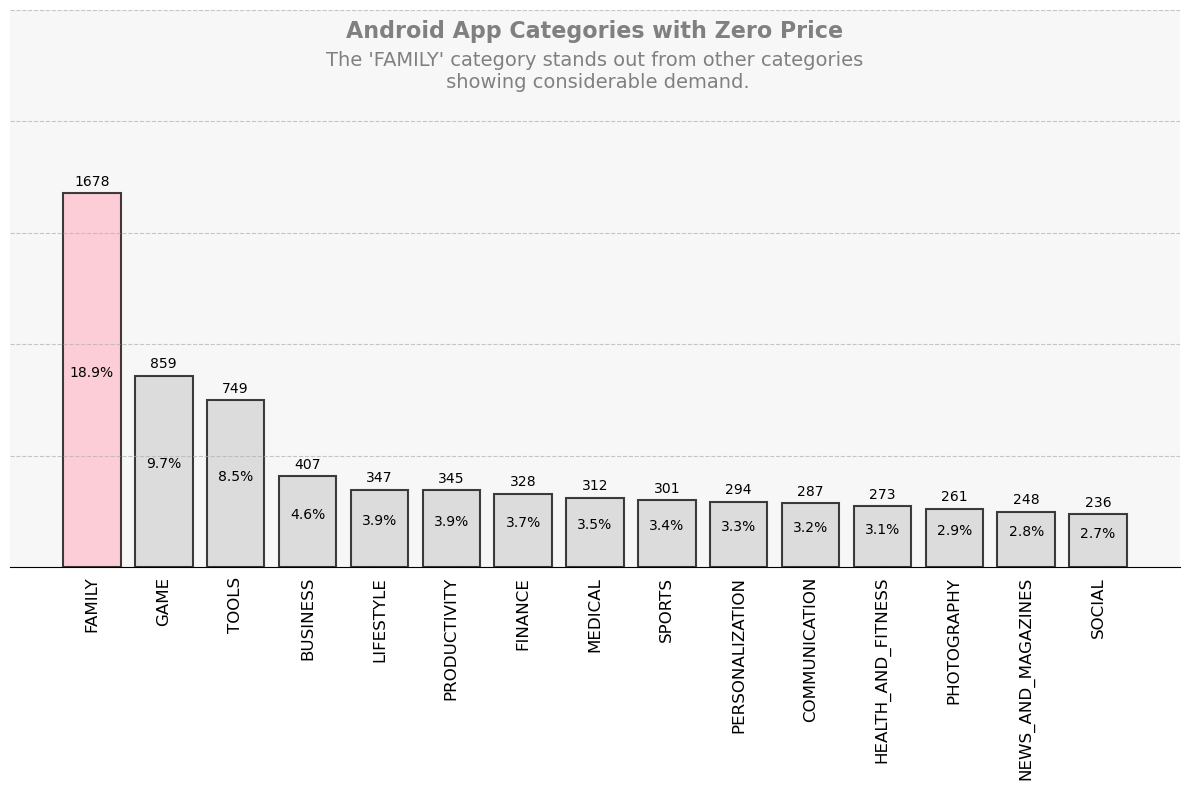

In [45]:
categories = android_final["Category"].value_counts().index[:15]
counts = android_final["Category"].value_counts().values[:15]
percentage = round(android_final["Category"].value_counts(normalize=True) * 100, 1)

# Create a stylish bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(categories, counts, color='lightgray', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle="", alpha=0.7)
plt.xticks(fontsize=12)  # Customized tick Labels
plt.yticks(range(0, 3000, 500), [], fontsize=12)  # Customized tick Labels and customized y-ticks range
plt.tick_params(bottom=0, left=0)

# Find the category with the highest count
max_count_category = categories[counts.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("pink")
bars[max_count_index].set_edgecolor('black')

# Adding data Labels and percentages inside each bar
for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, "%d" % int(height), ha='center', va='bottom',
             fontsize=10)
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{perc}%', ha='center', va='bottom', fontsize=10)

# Adding a background color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

# Add chart Title inside chart(Heading Line)
plt.text(0.5, 0.95, 'Android App Categories with Zero Price', horizontalalignment='center',
         transform=plt.gca().transAxes,
         color='grey', fontweight='bold', fontsize=16)

# Add chart Title inside chart(Bottom Line)
plt.text(0.5, 0.86, "The 'FAMILY' category stands out from other categories\n showing considerable demand.",
         horizontalalignment='center', transform=plt.gca().transAxes,
         color='grey', fontsize=14)

# Remove Spines(Boundaries lines removed)
for i in ['top', 'left', 'right']:
    plt.gca().spines[i].set_visible(False)

# Adjust layout to avoid clipping
plt.tight_layout()

plt.show()

In [46]:
android_final[android_final['Category'] == 'FAMILY']

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19922944.0,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,53477376.0,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
2019,Mahjong,FAMILY,4.5,33983,23068672.0,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,48234496.0,"1,000,000+",Free,0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.5,5761,22020096.0,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6,2621440.0,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13631488.0,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2726297.6,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,55574528.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


### The Most Popular Apps by Genre


For the Google Play market, we actually have data about the of installs, so we should be able to get a clearer picture about genre popularity, However, the install numbers don't seem precise enough. We can see that most values are open-ended(100+,1000+,5000+)

In [47]:
android_final['Installs'].value_counts(normalize = True)*100

1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: Installs, dtype: float64

In [48]:
android_final['Installs_int'] = android_final['Installs'].str.replace('+','').str.replace(',','').astype(int)
android_final['Installs_int']

0           10000
2         5000000
3        50000000
4          100000
5           50000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs_int, Length: 8863, dtype: int32

In [49]:
install_frq = android_final['Installs_int'].value_counts().sort_index()
install_frq = install_frq[install_frq.index > 500]
install_frq

1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: Installs_int, dtype: int64

In [50]:
install_frq_per = round(android_final['Installs_int'].value_counts(normalize = True)*100,2).sort_index()
install_frq_per = install_frq_per[install_frq_per.index > 500]
install_frq_per


1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: Installs_int, dtype: float64

In [51]:
#aplha numeric unit
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value/ 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

In [52]:
alphanumeric_units(1000000000)

'1B'

In [53]:
install_frq

1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: Installs_int, dtype: int64

In [54]:
install_frq.index = install_frq.index.map(alphanumeric_units)
install_frq

1K       745
5K       400
10K      904
50K      423
100K    1024
500K     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: Installs_int, dtype: int64

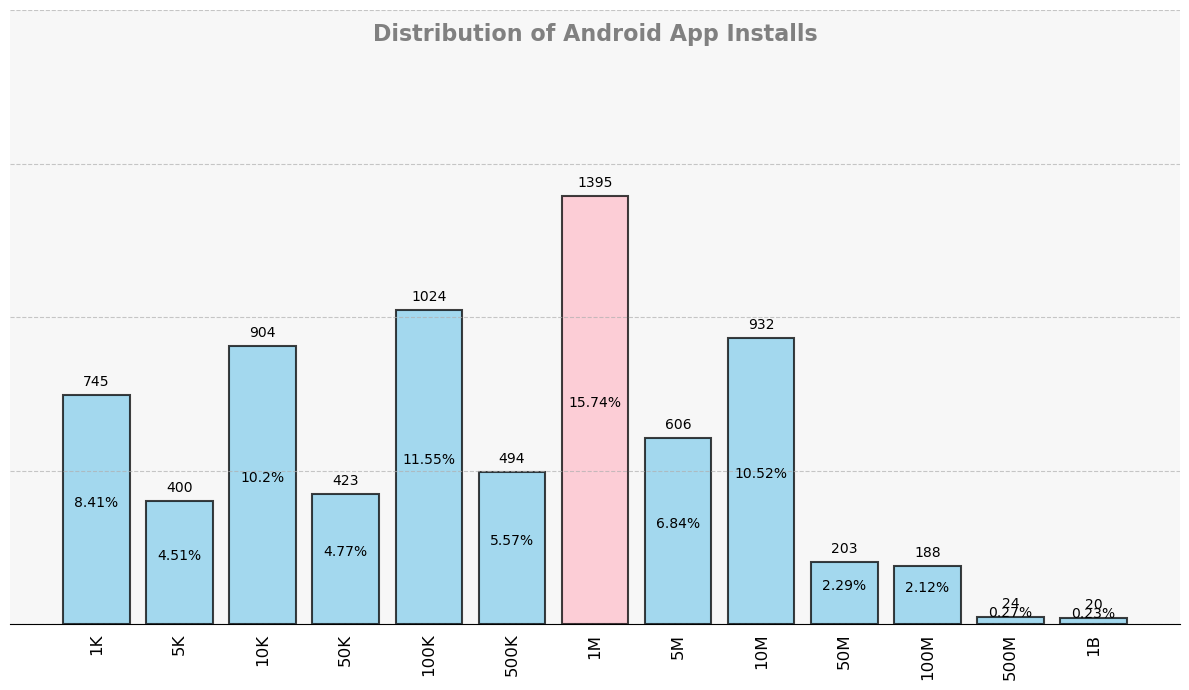

In [55]:
categories = install_frq.index
counts = install_frq.values
percentage1 = install_frq_per.values

# Create a stylish bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(categories, counts, color='skyblue', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle="")
plt.xticks(fontsize=12)  # Customized tick Labels
plt.yticks(range(0, 2500, 500), [], fontsize=12)  # Customized tick Labels and customized y-ticks range
plt.tick_params(bottom=0, left=0)

# Find the category with the highest count
max_count_category = categories[counts.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("pink")
bars[max_count_index].set_edgecolor('black')

# Adding data Labels and percentages inside each bar
for bar, perc in zip(bars, percentage1):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, "%d" % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{perc}%', ha='center', va='bottom', fontsize=10,
             color='black')  # Specify color here

# Adding a background color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

# Adding CHART TITLE inside the chart
plt.text(0.5, 0.95, 'Distribution of Android App Installs', horizontalalignment="center", fontsize=16, \
         transform=plt.gca().transAxes, color='gray', fontweight='bold')

# Removing spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()


In [56]:
categories_android = android_final['Category'].unique()
categories_android

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [57]:
pd.pivot_table(android_final, values='Installs_int', index = 'Category', aggfunc = 'mean')

,Installs_int
Category,
ART_AND_DESIGN,1.986335e+06
AUTO_AND_VEHICLES,6.473178e+05
BEAUTY,5.131519e+05
BOOKS_AND_REFERENCE,8.767812e+06
BUSINESS,1.712290e+06
COMICS,8.176573e+05
COMMUNICATION,3.845612e+07
DATING,8.540288e+05
EDUCATION,1.820673e+06


In [58]:
# Display dataframe without scientific notation
pd.options.display.float_format = '{:.0f}'.format

In [59]:
categories_installs = pd.pivot_table(android_final, values='Installs_int', index = 'Category', aggfunc = 'mean')
categories_installs = categories_installs.sort_values(by = 'Installs_int', ascending = False)
categories_installs = categories_installs['Installs_int']
categories_installs

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [60]:
def alphanum_units(value):
    if value >= 1e9:
        return f'{value/ 1e9:.1f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.1f}'

In [61]:
categories_installs_units = categories_installs.map(alphanum_units)
categories_installs_units

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

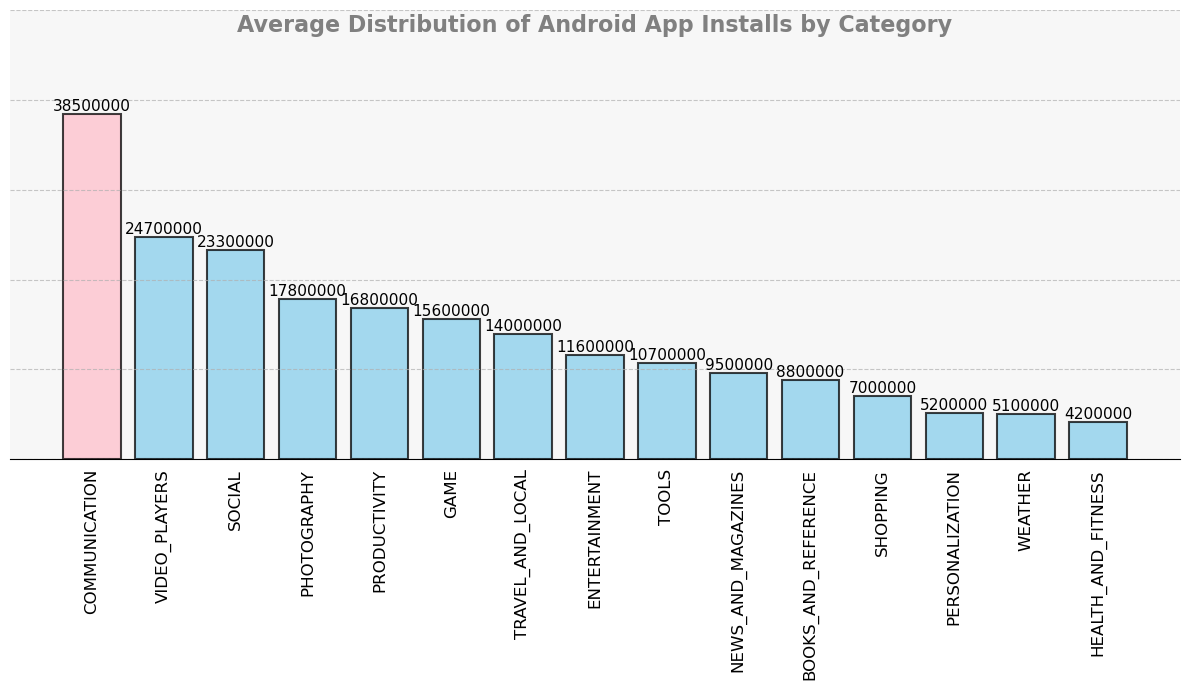

In [65]:
categories = categories_installs.index[:15]
counts = categories_installs.values[:15]

# Convert string units to numerical values
categories_installs_units_values = []
for unit in categories_installs_units.values:
    if 'M' in unit:
        value = float(unit.replace('M', '')) * 1000000  # Convert million to numerical value
        categories_installs_units_values.append(int(value))
    elif 'K' in unit:
        value = float(unit.replace('K', '')) * 1000  # Convert thousand to numerical value
        categories_installs_units_values.append(int(value))
    else:
        categories_installs_units_values.append(int(unit.replace(',', '')))  # Convert other units to integers

# Create a stylish bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(categories, counts, color='skyblue', alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle="")
plt.xticks(fontsize=12)  # Customized tick Labels
plt.yticks(range(0, 60000000, 10000000), [], fontsize=12)  # Customized tick Labels and customized y-ticks range
plt.tick_params(bottom=0, left=0)

# Find the category with the highest count
max_count_category = categories[counts.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("pink")
bars[max_count_index].set_edgecolor('black')

# Adding data Labels and percentages inside each bar
for bar, units in zip(bars, categories_installs_units_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 25, units, ha='center', va='bottom', fontsize=11)

# Adding a background color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

# Adding CHART TITLE inside the chart
plt.text(0.5, 0.95, 'Average Distribution of Android App Installs by Category', horizontalalignment="center",
         fontsize=16, transform=plt.gca().transAxes, color='gray', fontweight='bold')

# Removing spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()


# Observation


Communication apps lead the pack with a staggering 38.5 million installs, followed closely by Video Players at 24.7 million and Social
apps at 23.3 million. These categories demonstrate significant popularity among Android users. showcasing the prominence of
communication and media consumption in the mobile app landscape

# Conclusion

The analysis of the photography category reveals a significant trend towards the popularity of photo editing and collage-making applications, with numerous apps amassing over 100 million installs. This trend suggests a strong demand for photo-related functionalities among users. Consequently, there appears to be considerable potential for the development of a photo generation application in 2024. Such an app, offering prompt and free generation of pictures and photos, could leverage the existing user interest in photography apps. By providing innovative features, intuitive usability, and high-quality output, this application could distinguish itself in the competitive market and attract a substantial user base. Given the success of existing photography apps and the evolving preferences of users, investing in the development of a photo generation app appears promising for tapping into this lucrative market segment in 2024.